<a href="https://colab.research.google.com/github/mansooraha/landing-page-with-chatbot/blob/main/house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## data manipulation

In [ ]:
# Load the dataset (replace with your file path)
df = pd.read_csv('/content/archive.zip')


In [ ]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


## EDA

In [ ]:


print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None
                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%

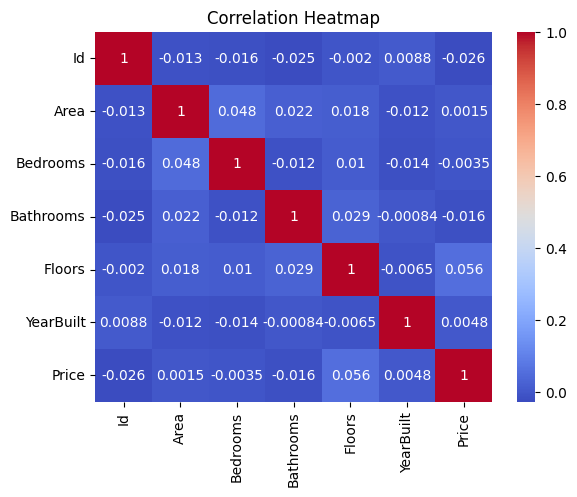

In [ ]:
# Visualizations
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [ ]:
# Data Preprocessing
# Fill missing values (example: with mean for simplicity)

# Select only numerical columns for filling missing values
numerical_cols = df.select_dtypes(include=np.number).columns

# Fill missing values in numerical columns with their respective means
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [ ]:
# Convert categorical variables into dummy/one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# Splitting data into features (X) and target (y)
X = df.drop('Price', axis=1)  # Replace 'Price' with your target column
y = df['Price']


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)


In [ ]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [ ]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Model Performance:
Mean Absolute Error (MAE): 242867.45
Mean Squared Error (MSE): 78279764120.86
Root Mean Squared Error (RMSE): 279785.21
R-squared (R2): -0.01


In [ ]:
# Example Prediction
example_input = X_test[0].reshape(1, -1)  # Take one example from the test set
predicted_price = model.predict(example_input)
print("\nExample Prediction:")
print(f"Predicted Price: {predicted_price[0]:.2f}")


Example Prediction:
Predicted Price: 511317.73
